In [265]:
#!/usr/bin/python

from __future__ import division
import seaborn as sns
import re, sys, os
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from scipy import stats
import scipy
import seaborn as sns
from os.path import isfile, join
import pandas as pd
import matplotlib
%matplotlib inline
from scipy.stats import mode
import statsmodels.api as sm
from IPython.display import HTML
from pylab import rcParams
import scipy as sp
import pylab

## Read Count Frequency Histogram and Genome Wide Distribution

In [266]:
def calc_coverage(row):
    return (row[x_name]/BIN_SIZE*READ_LEN)

In [267]:
# ARGUMENTS
KB = '10KB'
BIN_SIZE = 10000
READ_LEN = 76
AVG_BREADTH_COV = 0.1
FILE_TYPE = "merged_chrm_read_depth_files.csv"
DATA_DIR = "/n/fs/ragr-data/projects/scDNA/data/T5_normal_read_counts_10kb/"
onlyfiles = [f for f in listdir(DATA_DIR) if isfile(join(DATA_DIR, f)) and FILE_TYPE in f]
OUTPUT_DIR = "/n/fs/ragr-data/projects/scDNA/results/results_single-cell-cnv-inf/results_mine/"
idx=0

cell:  SRR3082469_1__merged_chrm_read_depth_files.csv
cell:  SRR3082444_1__merged_chrm_read_depth_files.csv
cell:  SRR3082443_1__merged_chrm_read_depth_files.csv
cell:  SRR3082321_1__merged_chrm_read_depth_files.csv
cell:  SRR3082457_1__merged_chrm_read_depth_files.csv
cell:  SRR3082322_1__merged_chrm_read_depth_files.csv
cell:  SRR3082497_1__merged_chrm_read_depth_files.csv
cell:  SRR3082445_1__merged_chrm_read_depth_files.csv
cell:  SRR3082424_1__merged_chrm_read_depth_files.csv
cell:  SRR3082425_1__merged_chrm_read_depth_files.csv
cell:  SRR3082420_1__merged_chrm_read_depth_files.csv
cell:  SRR3082328_1__merged_chrm_read_depth_files.csv
cell:  SRR3082325_1__merged_chrm_read_depth_files.csv
cell:  SRR3082326_1__merged_chrm_read_depth_files.csv
cell:  SRR3082422_1__merged_chrm_read_depth_files.csv
cell:  SRR3082511_1__merged_chrm_read_depth_files.csv
cell:  SRR3082320_1__merged_chrm_read_depth_files.csv
cell:  SRR3082480_1__merged_chrm_read_depth_files.csv
cell:  SRR3082484_1__merged_

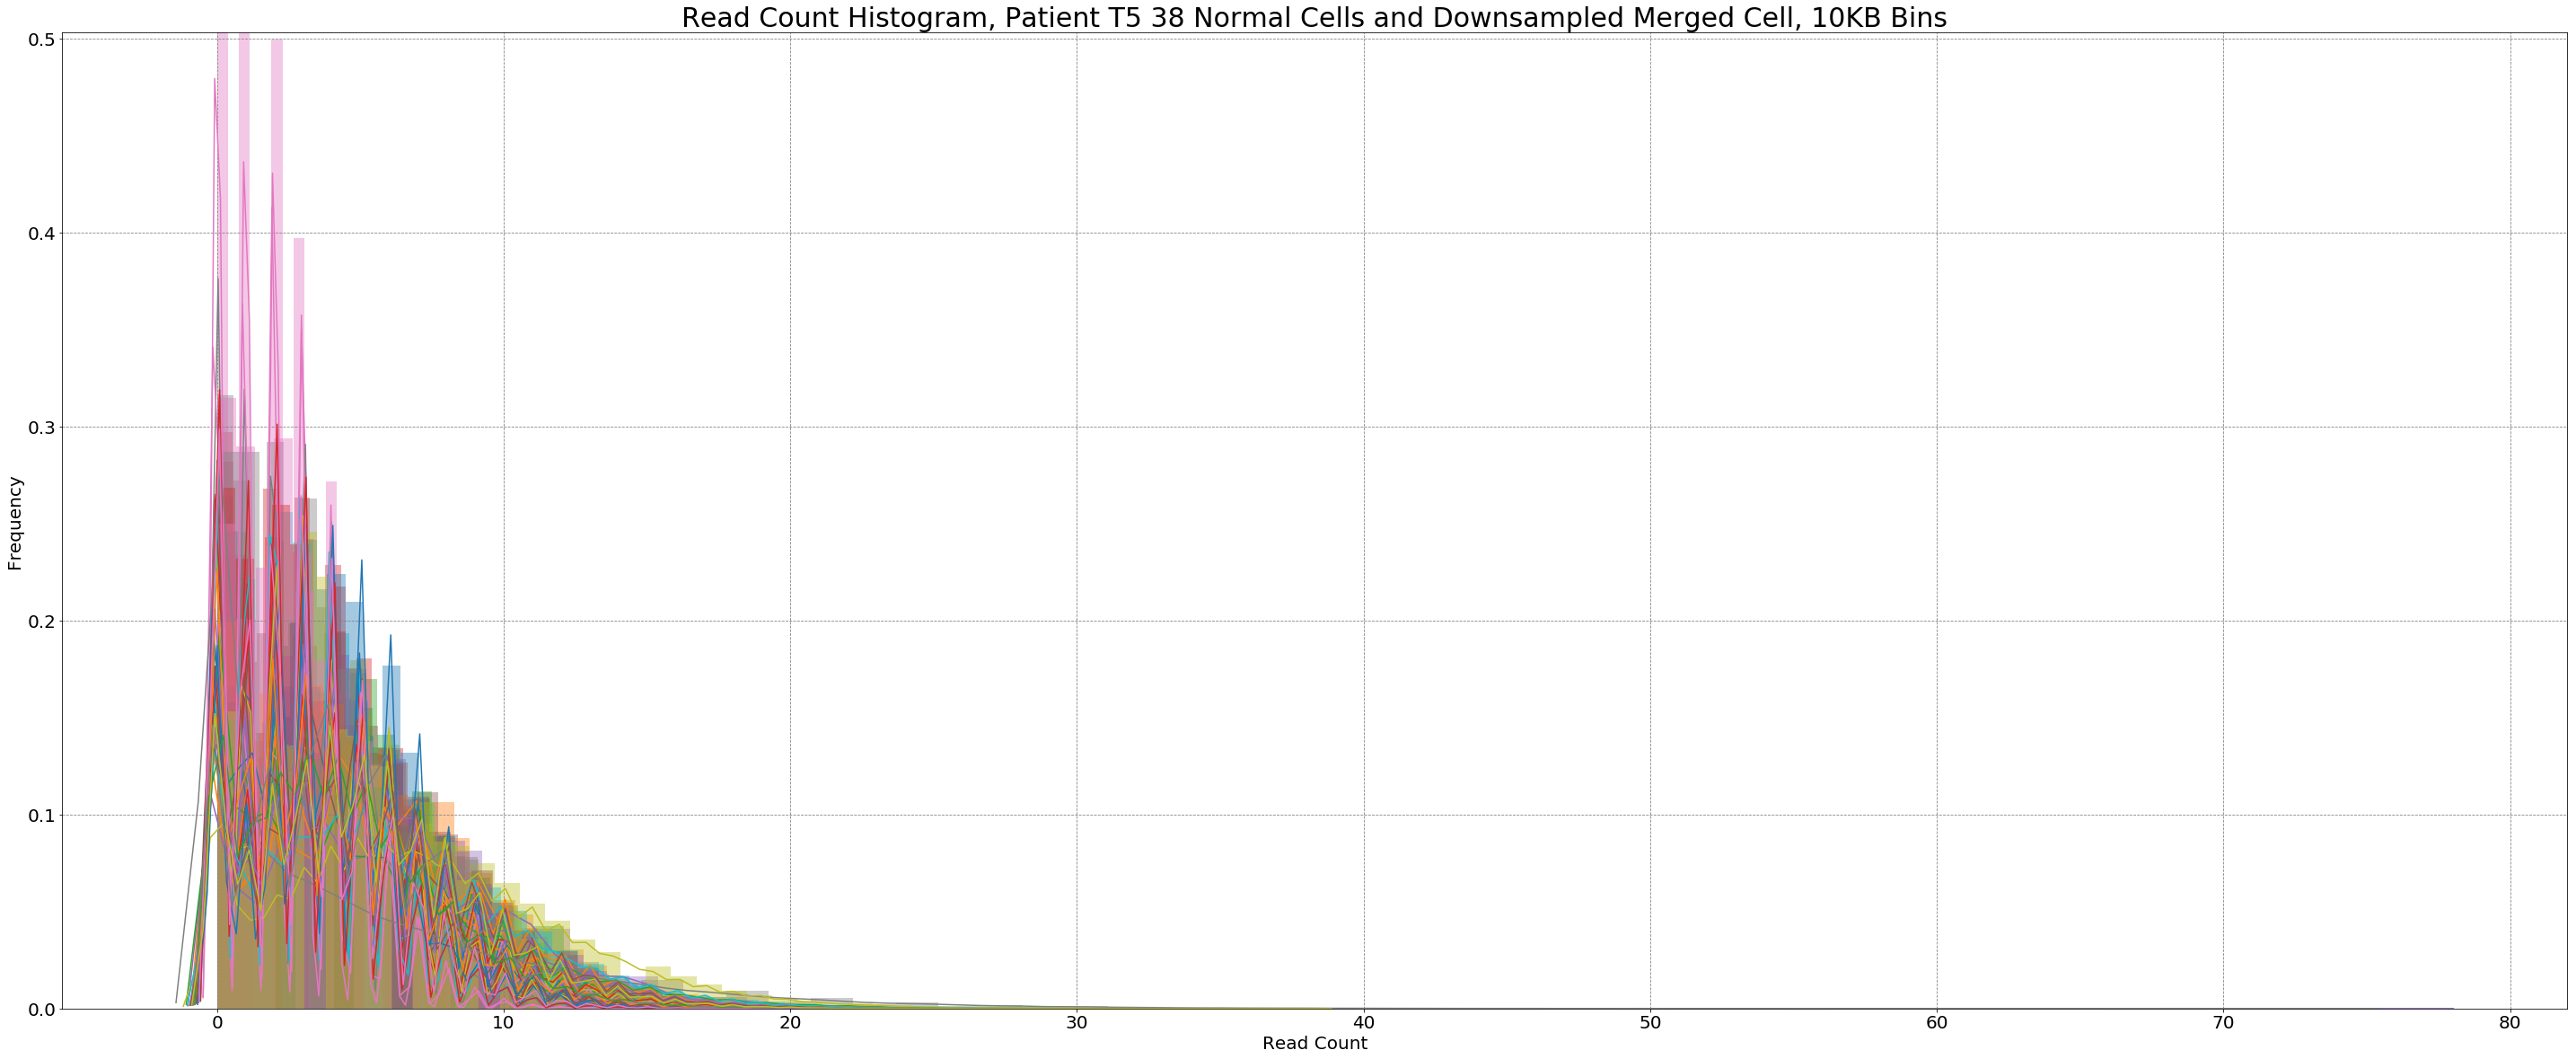

In [271]:
# Iterate through all cells
for i in onlyfiles:
    print "cell: ", i
    if "mergedCell" in i:
        print "merged cell is colored magenta"
        # Get vector of read counts
        x_df = pd.read_csv(DATA_DIR+"/"+i, sep=',')
        x_name = list(x_df)[-1]
        x_df = x_df[[x_name]] # gather only last column with the read counts
        # CALCULATING COVERAGE
        #x_df['COVERAGE'] = x_df.apply(calc_coverage, axis=1)
        #x_df = x_df[['COVERAGE']]
        x = np.array(sorted(x_df.as_matrix())[0:-1])# take off the outlier from the list
        fig = sns.distplot(x, color='magenta')
        #plot_coverage(x_df)# add to coverage plot
    else:
        # Get vector of read counts
        x_df = pd.read_csv(DATA_DIR+"/"+i, sep=',')
        x_name = list(x_df)[-1]
        x_df = x_df[[x_name]] # gather only last column with the read counts
        # CALCULATING COVERAGE
        #x_df['COVERAGE'] = x_df.apply(calc_coverage, axis=1)
        #x_df = x_df[['COVERAGE']]
        x = np.array(sorted(x_df.as_matrix())[0:-1])# take off the outlier from the list
        fig = sns.distplot(x)
        #plot_coverage(x_df) # add to coverage plot
    # KL-Divergence (Entropy function in python)
    #print scipy.stats.entropy(x, y) # P and Q. A value of 0 is no difference
    #print scipy.stats.chisquare(x,y)
    #num_bins = x.shape[0]
    #expected_rc = calc_expected_num_reads(250000,76,0.1)
plt.grid(b=True, which='major', color='grey', linestyle='--')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
plt.xlabel('Read Count', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Read Count Histogram, Patient T5 38 Normal Cells and Downsampled Merged Cell, %s Bins'%KB, fontsize = 30)
rcParams['figure.figsize'] = 50, 10
plt.savefig(OUTPUT_DIR+"/hist_plot_38_T5_normal_10kb_RC__qqplots.pdf")
plt.show()

In [260]:
# Plot read counts across genome
for i in onlyfiles:
    # Get vector of read counts
    x_df = pd.read_csv(DATA_DIR+"/"+i, sep=',').iloc[:,-1]
    #x = np.array(sorted(x_df.as_matrix())[0:-1])
    sns.regplot(x_df[], x_df.index)
    df.index.tolist()
    sys.exit()
    #print f
    # KL-Divergence (Entropy function in python)
    #print scipy.stats.entropy(x, y) # P and Q. A value of 0 is no difference
    #print scipy.stats.chisquare(x,y)
    #num_bins = x.shape[0]
    #expected_rc = calc_expected_num_reads(250000,76,0.1)
#plt.savefig("blah.pdf")
#plt.show()

SyntaxError: invalid syntax (<ipython-input-260-bcfe2a2d5aa4>, line 6)

### Q-Q Plots of Read Counts against Uniform Dist. ( Use KS-Div. afterwards)

In [148]:
def calc_expected_num_reads(BIN_SIZE, READ_LEN, AVG_BREADTH_COV):
    return int(round(BIN_SIZE * (AVG_BREADTH_COV / READ_LEN)))

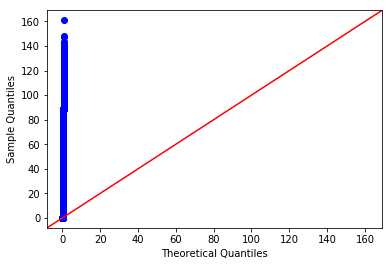

In [149]:
# QQ Plot of read count vector vs. uniform distribution
def qqplot():
    #x = np.array([2,2,4,1,5,6,8,2]); y = np.array([13]*num_bins)#np.array([2,1,2,2,1,2,2,1]) #x = np.array([1]*8); yn = np.array([1]*8)
    # num_bins = x.shape[0]
    #y = np.array([expected_rc]*num_bins)

    #PLOTTING QQ PLOT
    # 2 samples
    #sm.qqplot_2samples(x, stats.uniform,line='45')
    # 1 sample against uniform distribution
    sm.qqplot(x, stats.uniform, line='45')
    pylab.show()


## Example Plots

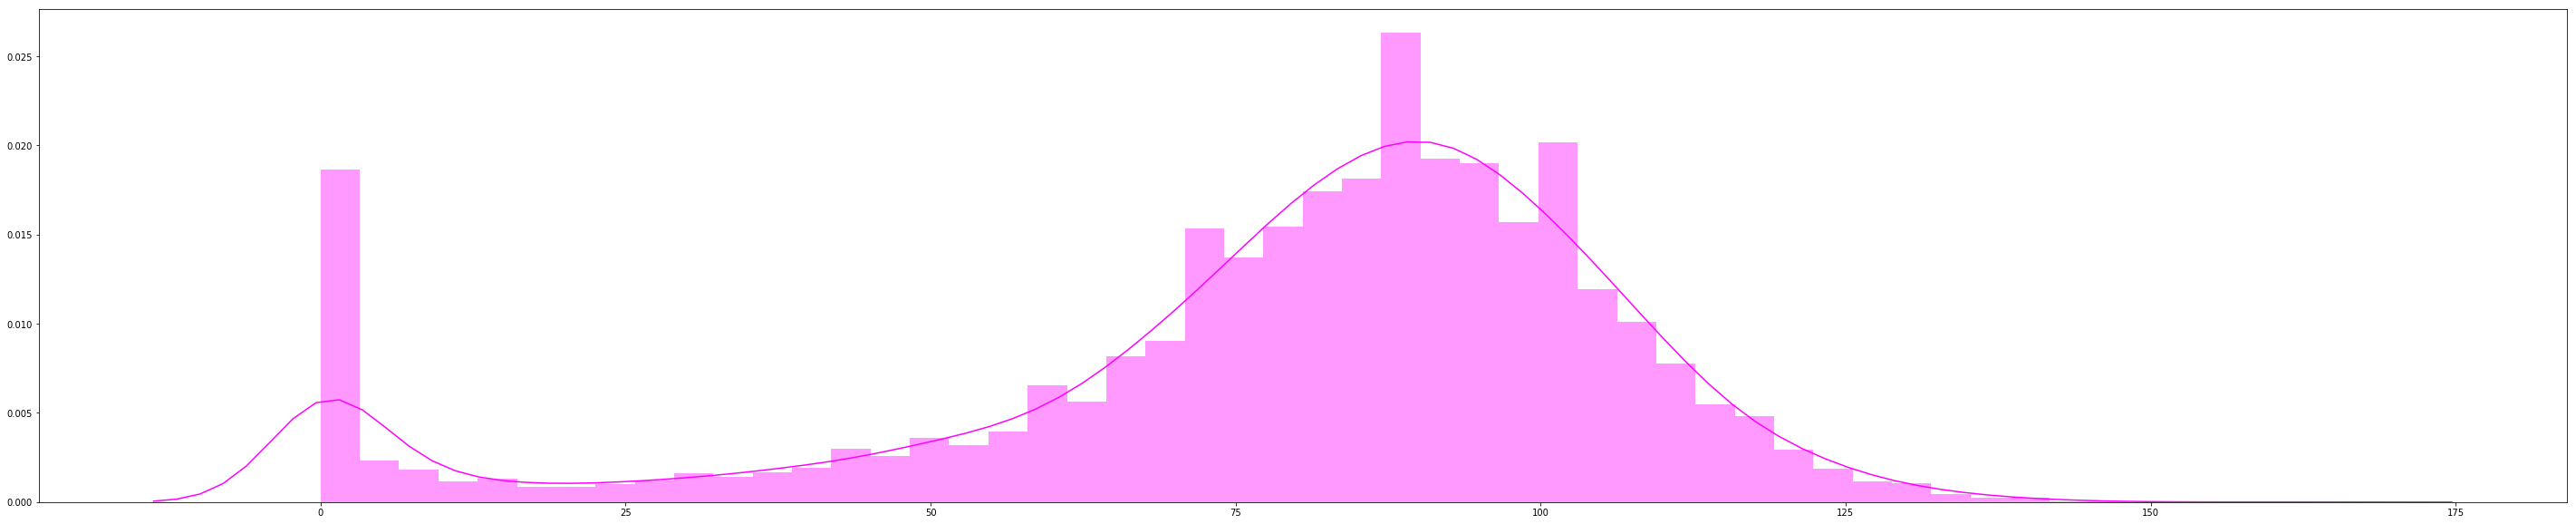

In [189]:
x_df = pd.read_csv("/n/fs/ragr-data/projects/scDNA/results/results_single-cell-cnv-inf/results_mine/T5_normal_read_counts_250kb/SRR3082145_1__merged_chrm_read_depth_files.csv").iloc[:,-1]
x = np.array(sorted(x_df.as_matrix())[0:-1])
sns.distplot(x, color='magenta')

In [255]:
#def plot_coverage():
    
x_df = pd.read_csv("/n/fs/ragr-data/projects/scDNA/results/results_single-cell-cnv-inf/results_mine/T5_normal_read_counts_250kb/SRR3082145_1__merged_chrm_read_depth_files.csv")
x_name = list(x_df)[-1]
x_df = x_df[[x_name]] # gather only last column with the read counts
x_df['COVERAGE'] = x_df.apply(calc_coverage, axis=1)
x_df = x_df[['COVERAGE']]
#print x_df.index #x_df.index.name = 'INDEX'
#sys.exit()
#x_df.rename_axis('INDEX').rename_axis("IDX", axis="columns")
#x = np.array(sorted(x_df.as_matrix())[0:-1])# take off the outlier from the list
        
# x = np.array(sorted(x_df.as_matrix())[0:-1])
# sns.distplot(x, color='magenta') 
# sns.regplot(x_df[], x_df.index)
# df.index.tolist()

ax = x_df # Column of SUM_NON-2 = COPY_NUMBER
fig = ax.plot(kind="bar", color="black", position=0, width=1.0, rot=0, ec='black', legend=False) ##

plt.tick_params(axis='both', which='major', labelsize=40)
plt.tick_params(axis='both', which='minor', labelsize=40)
plt.xlabel('Bin', fontsize=50)
plt.ylabel('Frequency', fontsize=50)

plt.title('Genome Coverage for 38 Normal Patient T5 Cells at %s' %str(BIN_SIZE), fontsize = 60) ##

plt.grid(b=True, which='major', color='grey', linestyle='dotted')
plt.xticks( rotation = 45)

ticks_x = list_chr# [0, 998, 1971, 2764, 3529, 4253, 4938, 5575, 6161, 6726, 7269, 7810, 8346, 8807, 9237, 9648, 10010, 10335, 10648, 10885, 11138, 11331, 11537, 12159]
labels = ['chr1', 'chr2', 'ch3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX']#, 'chrY']
plt.xticks(ticks_x, labels, rotation='vertical')
rcParams['figure.figsize'] = 150, 50
#plt.locator_params(tight=True, nbins= 100)

plt.savefig(OUTPUTDIR+"/coverage_across_genome_T5_38_normal__qqplots.pdf") ##
plt.show()

NameError: name 'list_chr' is not defined